### BY : KHALID OUHMAID  ET AYOUB BOUBKER 

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning) 



### I. Apprentissage supervisé : Feature engineering et Classification

#### 1. Chargement des données et préparation

In [2]:
#loading data
data = pd.read_csv('credit_scoring.csv', sep=';')

In [3]:
data.head(5)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [4]:
#Transforing data
X = data.iloc[:, 0:13].values
labels = data.iloc[:, 13].values


In [5]:
#Shape
print("taille du sortie :", labels.shape)
print("taille de données d'entrée :", X.shape)

taille du sortie : (4375,)
taille de données d'entrée : (4375, 13)


Total occurences of "positive" in array:  3159
Total occurences of "negative" in array:  1216


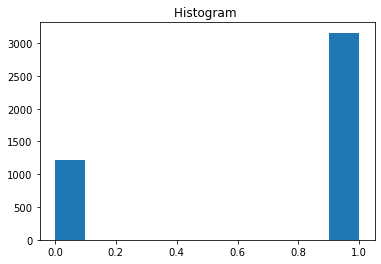

In [6]:
#hits
num_pos = (labels == 1).sum()
num_neg = (labels == 0).sum()
print('Total occurences of "positive" in array: ', num_pos)
print('Total occurences of "negative" in array: ', num_neg)
hist = plt.hist(labels) 
plt.title("Histogram ")
plt.show()

#### 2. Apprentissage et évaluation de modèles :

In [7]:
#Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.50, random_state=1)

#### We need to minimize the FALSE POSITIVE ( the ones that we predicted that will have a credit but they really don't deserve to have one)
#### So the Presicion is our concern

In [8]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

####  • Un arbre CART (random_state=1)

In [9]:
####-----------------         DecisionTree         ---------------####


clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred_DT = clf.predict(X_test)

Accuracy_DT_nan = metrics.accuracy_score(y_test, y_pred_DT)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_DT))

# Calculate the confusion matrix
conf_matrix_DT = confusion_matrix(y_true=y_test, y_pred=y_pred_DT)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y_pred_DT))
print('Recall: %.3f' % recall_score(y_test, y_pred_DT))

Accuracy_DT_nan = metrics.accuracy_score(y_test, y_pred_DT)
APrecision_DT_nan = precision_score(y_test, y_pred_DT)

Accuracy: 0.7271480804387569
Precision: 0.819
Recall: 0.799


#### •  k-plus-proches-voisins avec k=5

In [10]:
####-----------------         KNN         ---------------####



knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

#print("Accuracy:",knn_model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))

# Calculate the confusion matrix
conf_matrix_KNN = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y_pred_knn))
print('Recall: %.3f' % recall_score(y_test, y_pred_knn))

Accuracy_KNN_nan = metrics.accuracy_score(y_test, y_pred_knn)
APrecision_KNN_nan = precision_score(y_test, y_pred_knn)

Accuracy: 0.7248628884826326
Precision: 0.771
Recall: 0.882


#### • MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1

In [1]:
####-----------------         MLP         ---------------####

mlp = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=1)
mlp.fit(X_train,y_train)
y_pred_mlp = mlp.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mlp))

# Calculate the confusion matrix
conf_matrix_MLP = confusion_matrix(y_true=y_test, y_pred=y_pred_mlp)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y_pred_mlp))
print('Recall: %.3f' % recall_score(y_test, y_pred_mlp))


Accuracy_MLPC_nan = metrics.accuracy_score(y_test, y_pred_mlp)
APrecision_MLPC_nan = precision_score(y_test, y_pred_mlp)

NameError: name 'MLPClassifier' is not defined

#### 3. Normalisation des variables continues 

#### StandardScaler 

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)

NameError: name 'X_train' is not defined

In [ ]:
X_scaled_test = scaler.transform(X_test)

X_scaled_test

In [15]:
####  • Un arbre CART (random_state=1)

In [16]:
####-----------------         DecisionTree         ---------------####

clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_scaled_train, y_train)
y__scaled_SD_pred_DT = clf.predict(X_scaled_test)

print("Accuracy:",metrics.accuracy_score(y_test, y__scaled_SD_pred_DT))

# Calculate the confusion matrix
conf_matrix_DT_scaled = confusion_matrix(y_true=y_test, y_pred=y__scaled_SD_pred_DT)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y__scaled_SD_pred_DT))
print('Recall: %.3f' % recall_score(y_test, y__scaled_SD_pred_DT))

Accuracy_DT_SD = metrics.accuracy_score(y_test, y__scaled_SD_pred_DT)
APrecision_DT_SD = precision_score(y_test, y__scaled_SD_pred_DT)

Accuracy: 0.7271480804387569
Precision: 0.818
Recall: 0.801


#### •  k-plus-proches-voisins avec k=5

In [17]:
####-----------------         KNN         ---------------####
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_scaled_train, y_train)
y_scaled_pred_knn = knn_model.predict(X_scaled_test)

#print("Accuracy:",knn_model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_scaled_pred_knn))

# Calculate the confusion matrix
conf_matrix_KNN = confusion_matrix(y_true=y_test, y_pred=y_scaled_pred_knn)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y_scaled_pred_knn))
print('Recall: %.3f' % recall_score(y_test, y_scaled_pred_knn))

Accuracy_KNN_SD = metrics.accuracy_score(y_test, y_scaled_pred_knn)
APrecision_KNN_SD = precision_score(y_test, y_scaled_pred_knn)

Accuracy: 0.7527422303473492
Precision: 0.811
Recall: 0.859


#### • MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1

In [18]:
####-----------------         MLP         ---------------####
mlp = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=1)
mlp.fit(X_scaled_train,y_train)
y__scaled_pred_mlp = mlp.predict(X_scaled_test)


print("Accuracy:",metrics.accuracy_score(y_test, y__scaled_pred_mlp))

# Calculate the confusion matrix
conf_matrix_MLP = confusion_matrix(y_true=y_test, y_pred=y__scaled_pred_mlp)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y__scaled_pred_mlp))
print('Recall: %.3f' % recall_score(y_test, y__scaled_pred_mlp))

Accuracy_MLPC_SD = metrics.accuracy_score(y_test, y__scaled_pred_mlp)
APrecision_MLPC_SD = precision_score(y_test, y__scaled_pred_mlp)

Accuracy: 0.776508226691042
Precision: 0.838
Recall: 0.857


#### MinMax

In [19]:
from sklearn.preprocessing import MinMaxScaler

MM_Scaler = MinMaxScaler()

MM_Scaler.fit(X_train)
MM_X_train = MM_Scaler.transform(X_train)

In [20]:
MM_X_test = MM_Scaler.transform(X_test)

####  • Un arbre CART (random_state=1)

In [21]:
####-----------------         DecisionTree         ---------------####

clf = DecisionTreeClassifier(random_state=1)
clf.fit(MM_X_train, y_train)
y__scaled_SD_pred_DT = clf.predict(MM_X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y__scaled_SD_pred_DT))

# Calculate the confusion matrix
conf_matrix_DT_scaled = confusion_matrix(y_true=y_test, y_pred=y__scaled_SD_pred_DT)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y__scaled_SD_pred_DT))
print('Recall: %.3f' % recall_score(y_test, y__scaled_SD_pred_DT))

Accuracy_DT_MM = metrics.accuracy_score(y_test, y__scaled_SD_pred_DT)
APrecision_DT_MM = precision_score(y_test, y__scaled_SD_pred_DT)

Accuracy: 0.7285191956124314
Precision: 0.820
Recall: 0.801


#### •  k-plus-proches-voisins avec k=5

In [22]:
####-----------------         KNN         ---------------####
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(MM_X_train, y_train)
y_scaled_pred_knn = knn_model.predict(MM_X_test)

#print("Accuracy:",knn_model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, y_scaled_pred_knn))

# Calculate the confusion matrix
conf_matrix_KNN = confusion_matrix(y_true=y_test, y_pred=y_scaled_pred_knn)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y_scaled_pred_knn))
print('Recall: %.3f' % recall_score(y_test, y_scaled_pred_knn))

Accuracy_KNN_MM = metrics.accuracy_score(y_test, y_scaled_pred_knn)
APrecision_KNN_MM = precision_score(y_test, y_scaled_pred_knn)

Accuracy: 0.7454296160877514
Precision: 0.808
Recall: 0.851


#### • MultilayerPerceptron à deux couches de tailles respectives 40 et 20 et random_state=1

In [23]:
####-----------------         MLP         ---------------####
mlp = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=1)
mlp.fit(MM_X_train,y_train)
y__scaled_pred_mlp = mlp.predict(MM_X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y__scaled_pred_mlp))

# Calculate the confusion matrix
conf_matrix_MLP = confusion_matrix(y_true=y_test, y_pred=y__scaled_pred_mlp)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y__scaled_pred_mlp))
print('Recall: %.3f' % recall_score(y_test, y__scaled_pred_mlp))

Accuracy_MLPC_MM = metrics.accuracy_score(y_test, y__scaled_pred_mlp)
APrecision_MLPC_MM = precision_score(y_test, y__scaled_pred_mlp)

Accuracy: 0.7888482632541134
Precision: 0.832
Recall: 0.887


##### Interprétation (comparaison entre les résutatls sans et avec normalisation et standarisation): 

In [24]:
print("-------------------les résultats sans stanst ou normalisa : ---------------")
print("----les accuracy :                        raw data ;         StandardScale ;         MinMax")
print(f"          accuracy du MLPC         :{Accuracy_MLPC_nan}      ; {Accuracy_MLPC_SD}   ; {Accuracy_MLPC_MM} ;")
print(f"          accuracy du KNN          : {Accuracy_KNN_nan}     ; {Accuracy_KNN_SD}  ; ", {Accuracy_KNN_MM})
print(f"          accuracy du DecisionTree : {Accuracy_DT_nan}     ; {Accuracy_DT_SD}   ; {Accuracy_DT_MM}")
print("----les Precisions :                        raw data ;         StandardScale ;         MinMax")
print(f"          Precision du MLPC        : {APrecision_MLPC_nan}   ; {APrecision_MLPC_SD} ; {APrecision_MLPC_MM} ;")
print(f"          Precision du KNN         : {APrecision_KNN_nan}   ; {APrecision_KNN_SD}  ;  {APrecision_KNN_MM} ")
print(f"          Precision du DecisionTree: {APrecision_DT_nan}   ; {APrecision_DT_SD}   ; {APrecision_DT_MM}")


-------------------les résultats sans stanst ou normalisa : ---------------
----les accuracy :                        raw data ;         StandardScale ;         MinMax
          accuracy du MLPC         :0.7097806215722121      ; 0.776508226691042   ; 0.7888482632541134 ;
          accuracy du KNN          : 0.7248628884826326     ; 0.7527422303473492  ;  {0.7454296160877514}
          accuracy du DecisionTree : 0.7271480804387569     ; 0.7271480804387569   ; 0.7285191956124314
----les Precisions :                        raw data ;         StandardScale ;         MinMax
          Precision du MLPC        : 0.8613861386138614   ; 0.8381717109326745 ; 0.832345971563981 ;
          Precision du KNN         : 0.7709713024282561   ; 0.8106015485407981  ;  0.8076692630317556 
          Precision du DecisionTree: 0.8194174757281554   ; 0.8181818181818182   ; 0.8197674418604651


#####  Après la standarisation (StandardScaler) des données on trouve que les résultats progresse au niveau des 3 algos
##### Par rapport précision on trouve que le MLPC avec MinMax est plus performant

###  4. Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales :

In [25]:
###  ACP

from sklearn.decomposition import PCA

In [26]:


pca_raw = PCA(n_components=3)
pca_raw.fit(X_train)
pca_raw_tr = pca_raw.transform(X_train)
pca_raw_ts = pca_raw.transform(X_test)

pca_SD = PCA(n_components=3)
pca_SD.fit(X_scaled_train)
pca_SD_tr = pca_SD.transform(X_scaled_train)
pca_SD_ts = pca_SD.transform(X_scaled_test)

pca_MM = PCA(n_components=3)
pca_MM.fit(MM_X_train)
pca_MM_tr = pca_MM.transform(MM_X_train)
pca_MM_ts = pca_MM.transform(MM_X_test)
    



In [27]:
Xtr_pca_raw = np.concatenate((X_train, pca_raw_tr), axis=1)
Xts_pca_raw = np.concatenate((X_test, pca_raw_ts), axis=1)


Xtr_pca_SD = np.concatenate((X_scaled_train, pca_SD_tr), axis=1)
Xts_pca_SD = np.concatenate((X_scaled_test, pca_SD_ts), axis=1)


Xtr_pca_MM = np.concatenate((MM_X_train, pca_MM_tr), axis=1)
Xts_pca_MM = np.concatenate((MM_X_test, pca_MM_ts), axis=1)

####  -----------------         DecisionTree         ---------------####

In [28]:
####-----------------         DecisionTree         ---------------####
clf_raw = DecisionTreeClassifier(random_state=1)
clf_SD = DecisionTreeClassifier(random_state=1)
clf_MM = DecisionTreeClassifier(random_state=1)

clf_raw.fit(Xtr_pca_raw, y_train)
clf_SD.fit(Xtr_pca_SD, y_train)
clf_MM.fit(Xtr_pca_MM, y_train)


y__pred_raw = clf_raw.predict(Xts_pca_raw)
y__pred_SD = clf_SD.predict(Xts_pca_SD)
y__pred_MM = clf_MM.predict(Xts_pca_MM)


# Calculate the confusion matrix
conf_matrix_raw = confusion_matrix(y_true=y_test, y_pred=y__pred_raw)
conf_matrix_DT_scaled = confusion_matrix(y_true=y_test, y_pred=y__pred_SD)
conf_matrix_MM_scaled = confusion_matrix(y_true=y_test, y_pred=y__pred_MM)

#Accuracy , Precision & Recall
print("**************  DecisionTree ***********")
print("------------Raw data")
print("Accuracy:",metrics.accuracy_score(y_test, y__pred_raw))
print('Precision: %.3f' % precision_score(y_test, y__pred_raw))
print('Recall: %.3f' % recall_score(y_test, y__pred_raw))

print("------------Scaled Data : StandardScaler")
print("Accuracy:",metrics.accuracy_score(y_test, y__pred_SD))
print('Precision: %.3f' % precision_score(y_test, y__pred_SD))
print('Recall: %.3f' % recall_score(y_test, y__pred_SD))

print("------------Normalized Data : MinMax")
print("Accuracy:",metrics.accuracy_score(y_test, y__pred_MM))
print('Precision: %.3f' % precision_score(y_test, y__pred_MM))
print('Recall: %.3f' % recall_score(y_test, y__pred_MM))

**************  DecisionTree ***********
------------Raw data
Accuracy: 0.7404021937842779
Precision: 0.819
Recall: 0.823
------------Scaled Data : StandardScaler
Accuracy: 0.7362888482632541
Precision: 0.833
Recall: 0.795
------------Normalized Data : MinMax
Accuracy: 0.7221206581352834
Precision: 0.816
Recall: 0.795


#### -----------------         KNN         ---------------####

In [29]:
####-----------------         KNN         ---------------####
knn_model_raw = KNeighborsClassifier(n_neighbors=5)
knn_model_SD = KNeighborsClassifier(n_neighbors=5)
knn_model_MM = KNeighborsClassifier(n_neighbors=5)

knn_model_raw.fit(Xtr_pca_raw, y_train)
knn_model_SD.fit(Xtr_pca_SD, y_train)
knn_model_MM.fit(Xtr_pca_MM, y_train)


y_pr_raw_knn = knn_model_raw.predict(Xts_pca_raw)
y_pr_SD_knn = knn_model_SD.predict(Xts_pca_SD)
y_pr_MM_knn = knn_model_MM.predict(Xts_pca_MM)

#print("Accuracy:",knn_model.score(X_test, y_test))


# Calculate the confusion matrix
conf_matrix_KNN_raw = confusion_matrix(y_true=y_test, y_pred=y_pr_raw_knn)
conf_matrix_KNN_SD = confusion_matrix(y_true=y_test, y_pred=y_pr_SD_knn)
conf_matrix_KNN_MM = confusion_matrix(y_true=y_test, y_pred=y_pr_MM_knn)

#Precision & Recall
print("**************  KNN ***********")
print("------------raw data")
print("Accuracy:",metrics.accuracy_score(y_test, y_pr_raw_knn))
print('Precision: %.3f' % precision_score(y_test, y_pr_raw_knn))
print('Recall: %.3f' % recall_score(y_test, y_pr_raw_knn))

print("------------Standarized Data : StandardScaler")
print("Accuracy:",metrics.accuracy_score(y_test, y_pr_SD_knn))
print('Precision: %.3f' % precision_score(y_test, y_pr_SD_knn))
print('Recall: %.3f' % recall_score(y_test, y_pr_SD_knn))

print("------------Normalized Data : MinMax")
print("Accuracy:",metrics.accuracy_score(y_test, y_pr_MM_knn))
print('Precision: %.3f' % precision_score(y_test, y_pr_MM_knn))
print('Recall: %.3f' % recall_score(y_test, y_pr_MM_knn))

**************  KNN ***********
------------raw data
Accuracy: 0.7239488117001828
Precision: 0.767
Recall: 0.889
------------Standarized Data : StandardScaler
Accuracy: 0.756398537477148
Precision: 0.810
Recall: 0.866
------------Normalized Data : MinMax
Accuracy: 0.7445155393053017
Precision: 0.806
Recall: 0.852


#### -----------------         MLP         ---------------####

In [30]:
####-----------------         MLP         ---------------####
mlp_raw = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=1)
mlp_SD = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=1)
mlp_MM = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=1)

mlp_raw.fit(Xtr_pca_raw, y_train)
mlp_SD.fit(Xtr_pca_SD, y_train)
mlp_MM.fit(Xtr_pca_MM, y_train)

y_pr_raw_mlp = mlp_raw.predict(Xts_pca_raw)
y_pr_SD_mlp = mlp_SD.predict(Xts_pca_SD)
y_pr_MM_mlp = mlp_MM.predict(Xts_pca_MM)


# Calculate the confusion matrix
conf_matrix_MLP = confusion_matrix(y_true=y_test, y_pred=y_pr_raw_mlp)
conf_matrix_MLP = confusion_matrix(y_true=y_test, y_pred=y_pr_SD_mlp)
conf_matrix_MLP = confusion_matrix(y_true=y_test, y_pred=y_pr_MM_mlp)

#Precision & Recall
print("**************  MLPC ***********")
print("------------raw data")
print("Accuracy:",metrics.accuracy_score(y_test, y_pr_raw_mlp))
print('Precision: %.3f' % precision_score(y_test, y_pr_raw_mlp))
print('Recall: %.3f' % recall_score(y_test, y_pr_raw_mlp))

print("------------Standarized Data : StandardScaler")
print("Accuracy:",metrics.accuracy_score(y_test, y_pr_SD_mlp))
print('Precision: %.3f' % precision_score(y_test, y_pr_SD_mlp))
print('Recall: %.3f' % recall_score(y_test, y_pr_SD_mlp))

print("------------Normalized Data : MinMax")
print("Accuracy:",metrics.accuracy_score(y_test, y_pr_MM_mlp))
print('Precision: %.3f' % precision_score(y_test, y_pr_MM_mlp))
print('Recall: %.3f' % recall_score(y_test, y_pr_MM_mlp))

**************  MLPC ***********
------------raw data
Accuracy: 0.6873857404021938
Precision: 0.821
Recall: 0.727
------------Standarized Data : StandardScaler
Accuracy: 0.770109689213894
Precision: 0.827
Recall: 0.863
------------Normalized Data : MinMax
Accuracy: 0.7925045703839122
Precision: 0.835
Recall: 0.890


##### Interprétation d'après l'ajout des CP(1,2,3) à nos jeu de données : 
    # * DecisionTree : une petite augmenttaion au niveau des résultats
    # * KNN : je trouve pas une amélioration
    # * MLPC : une augmentation 
    ## Décision :  concatenation avec les CPs n'a pas ajouté une valeur remarquable

### 5. Sélection de variables

##### D'après les tests déja faits, je vais utiliser les données normalisées (MinMax)

#### Nous Utilisons  les données standarisées sans l'ajout des acp comme variables d'entrées
    MM_X_test ; MM_X_train

In [31]:
###datat = data.drop['Status']
Entre_labels = data.columns
Entre_labels = Entre_labels.drop(['Status'])



Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


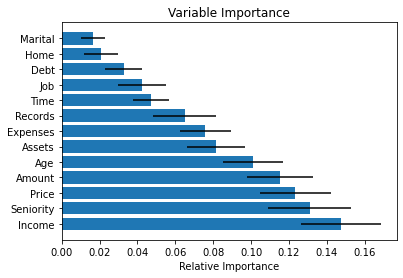

In [32]:
from sklearn.ensemble import RandomForestClassifier
Xtrain_scale = MM_X_train
Y1 = y_train

clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain_scale, Y1)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = Entre_labels
print(features[sorted_idx])
padding = np.arange(Xtrain_scale.size/len(Xtrain_scale)) + 0.5 
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center') 
plt.yticks(padding, features[sorted_idx]) 
plt.xlabel("Relative Importance")
plt.title("Variable Importance") 
plt.show()

##### Utilisation du KNN comme algo pour déterminer le nbr des varibles

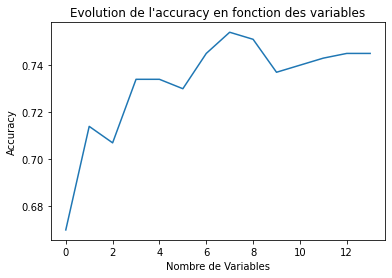

In [33]:
# Utilisation du KNN comme algo pour déterminer le nbr des varibles
Xtrain_scale = MM_X_train
Xtest_scale = MM_X_test 
Y1 = y_train

KNN=KNeighborsClassifier(n_neighbors=5)
scores_KNN=np.zeros(Xtrain_scale.shape[1]+1)
for f in np.arange(0, Xtrain_scale.shape[1]+1):
 X1_f = Xtrain_scale[:,sorted_idx[:f+1]]
 X2_f = Xtest_scale[:,sorted_idx[:f+1]]
 KNN.fit(X1_f,y_train)
 YKNN=KNN.predict(X2_f)
 scores_KNN[f]=np.round(metrics.accuracy_score(y_test,YKNN),3)
plt.plot(scores_KNN)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [34]:
print("Accuracy avec le nbr optimal des varibles calculé par KNN")
scores_KNN[7]

Accuracy avec le nbr optimal des varibles calculé par KNN


0.754

##### Utilisation du MLPC comme algo pour déterminer le nbr des varibles

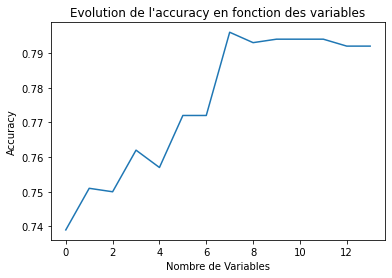

In [35]:
# Utilisation du MLPC comme algo pour déterminer le nbr des varibles
Xtrain_scale = MM_X_train
Xtest_scale = MM_X_test 
Y1 = y_train

MLPC = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=1)
scores_MLPC=np.zeros(Xtrain_scale.shape[1]+1)
for f in np.arange(0, Xtrain_scale.shape[1]+1):
 X1_f = Xtrain_scale[:,sorted_idx[:f+1]]
 X2_f = Xtest_scale[:,sorted_idx[:f+1]]
 MLPC.fit(X1_f,y_train)
 YMLPC = MLPC.predict(X2_f)
 scores_MLPC[f]=np.round(metrics.accuracy_score(y_test,YMLPC),3)
plt.plot(scores_MLPC)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [36]:
print("Accuracy avec le nbr optimal des varibles calculé par MLPC")
scores_MLPC[7]

Accuracy avec le nbr optimal des varibles calculé par MLPC


0.796

#### on garde 7 :  ( le mm nbr des variables à utiliser pour les 2 algo)

#### Nous utilisons les données cancatainées avec les PCs

######  Xtr_pca_MM ; Xts_pca_MM 

In [37]:
Entre_labels_pca = Entre_labels
Entre_labels_pca = Entre_labels_pca.append(pd.Index(['PC1','PC2', 'PC3']))


Index(['Income', 'PC3', 'PC2', 'Seniority', 'PC1', 'Amount', 'Price', 'Age',
       'Assets', 'Records', 'Expenses', 'Time', 'Debt', 'Job', 'Home',
       'Marital'],
      dtype='object')


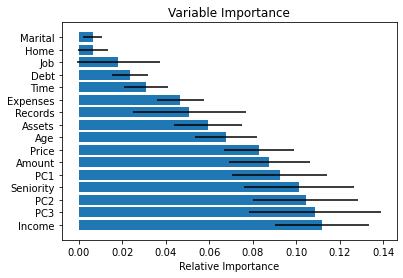

In [38]:

from sklearn.ensemble import RandomForestClassifier
Xtrain_scale = Xtr_pca_MM
Y1 = y_train

clf = RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain_scale, Y1)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx_acp = np.argsort(importances)[::-1]
features = Entre_labels_pca
print(features[sorted_idx_acp])
padding = np.arange(Xtrain_scale.size/len(Xtrain_scale)) + 0.5 
plt.barh(padding, importances[sorted_idx_acp],xerr=std[sorted_idx_acp], align='center') 
plt.yticks(padding, features[sorted_idx_acp]) 
plt.xlabel("Relative Importance")
plt.title("Variable Importance") 
plt.show()

##### Utilisation du KNN comme algo pour déterminer le nbr des varibles

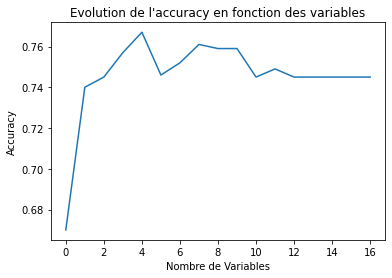

In [39]:
# Utilisation du KNN comme algo pour déterminer le nbr des varibles
Ytrain =  y_train
Ytest = y_test

KNN=KNeighborsClassifier(n_neighbors=5)
scores_KNN_PCA=np.zeros(Xtr_pca_MM.shape[1]+1)
for f in np.arange(0, Xtr_pca_MM.shape[1]+1):
 X1_f = Xtr_pca_MM[:,sorted_idx_acp[:f+1]]
 X2_f = Xts_pca_MM[:,sorted_idx_acp[:f+1]]
 KNN.fit(X1_f,Ytrain)
 YKNN=KNN.predict(X2_f)
 scores_KNN_PCA[f]=np.round(metrics.accuracy_score(Ytest,YKNN),3)
plt.plot(scores_KNN_PCA)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [40]:
print("Accuracy avec le nbr optimal des varibles calculé par KNN")
scores_KNN_PCA[4]

Accuracy avec le nbr optimal des varibles calculé par KNN


0.767

##### Utilisation du MLPC comme algo pour déterminer le nbr des varibles

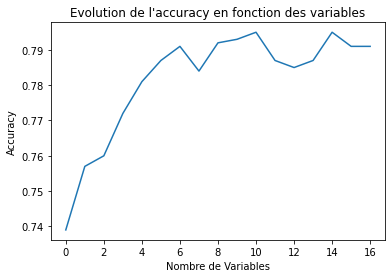

In [41]:
# Utilisation du MLPC comme algo pour déterminer le nbr des varibles
Ytrain =  y_train
Ytest = y_test

MLPC = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=1)
scores_MLPC_PCA=np.zeros(Xtr_pca_MM.shape[1]+1)
for f in np.arange(0, Xtr_pca_MM.shape[1]+1):
 X1_f = Xtr_pca_MM[:,sorted_idx_acp[:f+1]]
 X2_f = Xts_pca_MM[:,sorted_idx_acp[:f+1]]
 MLPC.fit(X1_f,Ytrain)
 YMLPC = MLPC.predict(X2_f)
 scores_MLPC_PCA[f]=np.round(metrics.accuracy_score(Ytest,YMLPC),3)
plt.plot(scores_MLPC_PCA)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [42]:

print("Accuracy avec le nbr optimal des varibles calculé par KNN")
scores_MLPC_PCA[7]

Accuracy avec le nbr optimal des varibles calculé par KNN


0.784

##### D'après les 2 tests réalisés( avec ACP en utilisant KNN et MLPC), KNN a pu atteindre 0.76 avec 4 variables, mais notre chois était d'utiliser les variables (7 variables ) résultatnes du MLPC

### 6. Paramétrage des classifieurs :
#### GridSearch

In [43]:
# sans ACP without variable selection  : MM_X_train ; MM_X_test 
# with ACP without variable selection  : Xtr_pca_MM ; Xts_pca_MM 
 
# Entre_labels  ; sorted_idx
# Entre_labels_pca  ; sorted_idx_acp

In [44]:
import_var_idx = sorted_idx[:7]
import_var_idx_out = sorted_idx[7:]

import_var_idx_pca = sorted_idx_acp[:7]
import_var_idx_out_pca = sorted_idx_acp[7:]

In [45]:
MM_X_train_7 = np.delete(MM_X_train, import_var_idx_out, 1)
MM_X_test_7 = np.delete(MM_X_test, import_var_idx_out, 1)

Xtr_pca_MM_7 = np.delete(Xtr_pca_MM, import_var_idx_out_pca, 1)
Xts_pca_MM_7 = np.delete(Xts_pca_MM, import_var_idx_out_pca, 1)

#### ----------------------------- KNN : sans ACP------------------###


In [46]:
#Sans acp
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5)
  
# fitting the model for grid search
grid_search = grid.fit(MM_X_train_7, y_train)


print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 19}
Accuracy for our training dataset with tuning is : 73.84%


In [47]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(MM_X_train_7, y_train)
y_test_hat=knn.predict(MM_X_test_7) 
test_accuracy=metrics.accuracy_score(y_test,y_test_hat)*100

print("-------KNN sans CPs : ")
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

# Calculate the confusion matrix
conf_matrix_KNN = confusion_matrix(y_true=y_test, y_pred=y_test_hat)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y_test_hat))
print('Recall: %.3f' % recall_score(y_test, y_test_hat))

-------KNN sans CPs : 
Accuracy for our testing dataset with tuning is : 75.05%
Precision: 0.773
Recall: 0.928


#### ----------------------------- KNN : avec ACP------------------

In [48]:
# avec les PCs (ACP)
knn_acp = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn_acp, param_grid, cv=5)
  
# fitting the model for grid search
grid_search = grid.fit(Xtr_pca_MM_7, y_train)


print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

{'n_neighbors': 27}
Accuracy for our training dataset with tuning is : 75.99%


In [49]:
knn_acp = KNeighborsClassifier(n_neighbors=13)
knn_acp.fit(Xtr_pca_MM_7, y_train)
y_test_hat=knn_acp.predict(Xts_pca_MM_7) 
test_accuracy=metrics.accuracy_score(y_test,y_test_hat)*100
print("-------KNN avec CPs : ")
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

# Calculate the confusion matrix
conf_matrix_KNN = confusion_matrix(y_true=y_test, y_pred=y_test_hat)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y_test_hat))
print('Recall: %.3f' % recall_score(y_test, y_test_hat))

-------KNN avec CPs : 
Accuracy for our testing dataset with tuning is : 77.38%
Precision: 0.814
Recall: 0.891


#### -----------------         MLP : sans acp        ---------------####

In [50]:


parameters = {
    'hidden_layer_sizes': [(40,20), (20,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


clf = GridSearchCV(MLPClassifier(), parameters, cv=5)

clf.fit(MM_X_train, y_train)
print(clf.score(MM_X_train, y_train))
print(clf.best_params_)

0.7969821673525377
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [51]:

mlp = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=0, solver='adam', activation='tanh', alpha=0.0001, learning_rate = 'adaptive')
mlp.fit(MM_X_train,y_train)
y__scaled_pred_mlp = mlp.predict(MM_X_test)

print("-------MLPC sans CPs : ")
print("Accuracy:",metrics.accuracy_score(y_test, y__scaled_pred_mlp))

# Calculate the confusion matrix
conf_matrix_MLP = confusion_matrix(y_true=y_test, y_pred=y__scaled_pred_mlp)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y__scaled_pred_mlp))
print('Recall: %.3f' % recall_score(y_test, y__scaled_pred_mlp))

-------MLPC sans CPs : 
Accuracy: 0.7984460694698354
Precision: 0.828
Recall: 0.911


#### ----------------------------- MLPC : avec ACP------------------

In [52]:
# avec les PCs
parameters = {
    'hidden_layer_sizes': [(40,20), (20,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


clf = GridSearchCV(MLPClassifier(), parameters, cv=5)

clf.fit(Xtr_pca_MM, y_train)
print(clf.score(Xtr_pca_MM, y_train))
print(clf.best_params_)

0.8052126200274349
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (40, 20), 'learning_rate': 'constant', 'solver': 'adam'}


In [53]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 20),random_state=0, solver='adam', activation='tanh', alpha=0.0001, learning_rate = 'adaptive')
mlp.fit(Xtr_pca_MM,y_train)
y__scaled_pred_mlp = mlp.predict(Xts_pca_MM)

print("-------MLPC avec CPs : ")
print("Accuracy:",metrics.accuracy_score(y_test, y__scaled_pred_mlp))

# Calculate the confusion matrix
conf_matrix_MLP = confusion_matrix(y_true=y_test, y_pred=y__scaled_pred_mlp)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y__scaled_pred_mlp))
print('Recall: %.3f' % recall_score(y_test, y__scaled_pred_mlp))

-------MLPC avec CPs : 
Accuracy: 0.7920475319926874
Precision: 0.831
Recall: 0.895


#### -----------------  DecisionTree :  sans ACP -------------------###

In [54]:
#sans acp
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
grid_search_cv.fit(MM_X_train, y_train)
print(grid_search_cv.score(MM_X_train, y_train))
print(grid_search_cv.best_params_)

0.7887517146776406
{'max_leaf_nodes': 14, 'min_samples_split': 2}


In [55]:
clf = DecisionTreeClassifier(random_state=1, max_leaf_nodes=14, min_samples_split=2)
clf.fit(MM_X_train, y_train)
y__scaled_PCA_pred_DT = clf.predict(MM_X_test)
print("-------DT sans CPs : ")
print("Accuracy:",metrics.accuracy_score(y_test, y__scaled_PCA_pred_DT))

# Calculate the confusion matrix
conf_matrix_DT_scaled = confusion_matrix(y_true=y_test, y_pred=y__scaled_PCA_pred_DT)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y__scaled_PCA_pred_DT))
print('Recall: %.3f' % recall_score(y_test, y__scaled_PCA_pred_DT))

-------DT sans CPs : 
Accuracy: 0.7655393053016454
Precision: 0.836
Recall: 0.841


#### -----------------  DecisionTree :  avec ACP -------------------###

In [56]:
# avec les PCs

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
grid_search_cv.fit(Xtr_pca_MM, y_train)
print(grid_search_cv.score(Xtr_pca_MM, y_train))
print(grid_search_cv.best_params_)

0.8148148148148148
{'max_leaf_nodes': 27, 'min_samples_split': 3}


In [57]:
clf = DecisionTreeClassifier(random_state=1, max_leaf_nodes=27, min_samples_split=2)
clf.fit(Xtr_pca_MM, y_train)
y__scaled_PCA_pred_DT = clf.predict(Xts_pca_MM)

print("-------DT avec CPs : ")
print("Accuracy:",metrics.accuracy_score(y_test, y__scaled_PCA_pred_DT))

# Calculate the confusion matrix
conf_matrix_DT_scaled = confusion_matrix(y_true=y_test, y_pred=y__scaled_PCA_pred_DT)

#Precision & Recall
print('Precision: %.3f' % precision_score(y_test, y__scaled_PCA_pred_DT))
print('Recall: %.3f' % recall_score(y_test, y__scaled_PCA_pred_DT))

-------DT avec CPs : 
Accuracy: 0.7714808043875686
Precision: 0.836
Recall: 0.851


### 7. Création d’un pipeline :

In [58]:
### PiPeLine
from sklearn.pipeline import Pipeline 

#### Using : MinMax + Acp(concatener avec the rest) + selection de 7 variables basée  MLPC + l'algo d'apprentissa final (MLPC) 
#### MLPC : avec les para : {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (40, 20), 'learning_rate': 'adaptive', 'solver': 'adam'}

###### # crétation de la fonction pre_processing qui contient les différents traitement (standarisation, ajout des PCs 'ACP' et enfin sélection de varibles ) 

In [59]:

from sklearn.base import BaseEstimator

class PreProcessing(BaseEstimator):

    def __init__(self, scaler, pca_, sorted_x):
        self.scaler = scaler
        self.pca_ = pca_
        self.sorted_x = sorted_x

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        X_scaled = self.scaler.transform(X_)
        X_sc_pca = self.pca_.transform(X_scaled)
        Xtr_pca_SD = np.concatenate((X_scaled, X_sc_pca), axis=1)
        import_var_idx_pca = self.sorted_x[:7]
        X_cleaned = np.delete(Xtr_pca_SD, import_var_idx_pca, 1)
        return X_cleaned
        

In [60]:
from sklearn.pipeline import Pipeline 

model_pipeline = Pipeline(steps=[('PreProcessing', PreProcessing(MM_Scaler, pca_MM, sorted_idx_acp)), 
                                 ('MLPC', MLPClassifier(hidden_layer_sizes=(40, 20),random_state=0, solver='adam', activation='tanh', alpha=0.0001, learning_rate = 'adaptive'))
                                 ])

####  Applying Pipe on our Data

#### On train data

In [61]:
###  Applying Pipe on our Data

# X_train, X_test, y_train, y_test

    # fit the pipeline with the training data
model_pipeline.fit(X_train,y_train)

    # predict target values on the training data
predi_pipe = model_pipeline.predict(X_train)

print("the pipeline__  Train")
print("Accuracy:",metrics.accuracy_score(y_train, predi_pipe))
print('Precision: %.3f' % precision_score(y_train, predi_pipe))
print('Recall: %.3f' % recall_score(y_train, predi_pipe))

the pipeline__  Train
Accuracy: 0.7718335619570188
Precision: 0.797
Recall: 0.916


#### on Test data

In [62]:

    # fit the pipeline with the test data
model_pipeline.fit(X_test,y_test)

    # predict target values on the test data
predi_pipe_test = model_pipeline.predict(X_test)

print("the pipeline__  Test")
print("Accuracy:",metrics.accuracy_score(y_test, predi_pipe_test))
print('Precision: %.3f' % precision_score(y_test, predi_pipe_test))
print('Recall: %.3f' % recall_score(y_test, predi_pipe_test))

the pipeline__  Test
Accuracy: 0.7582266910420475
Precision: 0.792
Recall: 0.904


In [63]:
import pickle

pickle.dump(model_pipeline, open("results/Final_model.pkl", "wb"))



FileNotFoundError: [Errno 2] No such file or directory: 'results/Final_model.pkl'

### 8. Comparaison de plusieurs algorithmes d’apprentissage

###  Création du run_classifiers 

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from scipy import interp



clfs = { 
    'GB' : GaussianNB(),
    'DT' : DecisionTreeClassifier(random_state=1, max_leaf_nodes=14, min_samples_split=2),
    'RF': RandomForestClassifier(n_estimators=50, random_state=1),
    'MLPC' : MLPClassifier(hidden_layer_sizes=(20, 10)),
    'KNN': KNeighborsClassifier(n_neighbors=13),
    'AdaBoost' : AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=1, max_leaf_nodes=14, min_samples_split=2),
                                    n_estimators=50, random_state=0),
    'Bagging' : BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state=1, max_leaf_nodes=14, min_samples_split=2), n_estimators=50, 
                                        random_state=1)
    
    
}



In [65]:
Algos = ['GB', 'DT', 'RF', 'MLPC', 'KNN', 'AdaBoost', 'Bagging']

In [66]:
def run_classifiers(clfs, X, labels):
    l = 0
    for i in clfs:
        clf = clfs[i]
        cv = StratifiedKFold(n_splits=10,shuffle=False)
        accurs = []
        presis = []
        aucs = []
        i = 1
        for train,test in cv.split(X, labels):
            clf.fit(np.take(X, train, axis = 0),np.take(labels, train, axis = 0))
            prediction = clf.predict(np.take(X, test, axis = 0))
            accur = metrics.accuracy_score(labels[test], prediction)
            accurs.append(accur)
            presi = precision_score(labels[test], prediction)
            presis.append(presi)
            fpr, tpr, thresholds = metrics.roc_curve(labels[test], prediction) 
            auc = metrics.auc(fpr, tpr)
            aucs.append(auc)
        print(f"-----------** Algo used : {Algos[l]} **------------")
        print(f"Accuracy Moyenne : {np.mean(accurs)};  STD : {np.std(accurs)}")
        print(f"Precision Moyenne : {np.mean(presis)};  STD : {np.std(presis)}")          
        print(f"AUC Moyenne : {np.mean(aucs)};  STD : {np.std(aucs)}")
        l = l+ 1

#### Applying run-classifers on raw data

In [67]:
# for raw data
run_classifiers(clfs, X, labels)

-----------** Algo used : GB **------------
Accuracy Moyenne : 0.769134196420175;  STD : 0.019254854819342068
Precision Moyenne : 0.83013772812129;  STD : 0.017456106390382004
AUC Moyenne : 0.6995273126317383;  STD : 0.026830948478299716
-----------** Algo used : DT **------------
Accuracy Moyenne : 0.7629666781605592;  STD : 0.014490737173755767
Precision Moyenne : 0.8036856552004684;  STD : 0.01982810138124268
AUC Moyenne : 0.6609022229800777;  STD : 0.03145340783816196
-----------** Algo used : RF **------------
Accuracy Moyenne : 0.7812545061283346;  STD : 0.014630713355477389
Precision Moyenne : 0.8196438562695993;  STD : 0.015544217820900251
AUC Moyenne : 0.6907433206433377;  STD : 0.02395520370638492
-----------** Algo used : MLPC **------------
Accuracy Moyenne : 0.7174341452201081;  STD : 0.06002254418139846
Precision Moyenne : 0.7919978088072055;  STD : 0.04471892886707363
AUC Moyenne : 0.6190819197654829;  STD : 0.06430763383106396
-----------** Algo used : KNN **-----------

##### Interprétation : d'après l'utilisation des différents algos, on constate que RandumForrest donne des résultats plus satisfaisantes que les autres 

#### Applying run-classifers on cleand data #( data passé par pre_processing obtenus après les tests): 

In [68]:
# cleaned data ( data passé par pre_processing obtenus après les tests): 
#Xtr_pca_MM, y_train, Xts_pca_MM, y_test
X_cleaned = np.concatenate((Xtr_pca_MM, Xts_pca_MM), axis=0)
run_classifiers(clfs, X_cleaned, labels)

-----------** Algo used : GB **------------
Accuracy Moyenne : 0.6973694659519556;  STD : 0.014960898669333172
Precision Moyenne : 0.7245081873402369;  STD : 0.007576443665124764
AUC Moyenne : 0.5056607440017332;  STD : 0.01747924337790674
-----------** Algo used : DT **------------
Accuracy Moyenne : 0.7154336854644054;  STD : 0.01166239164580017
Precision Moyenne : 0.7231485885092416;  STD : 0.004024331217311154
AUC Moyenne : 0.5027486756108311;  STD : 0.009411850840153972
-----------** Algo used : RF **------------
Accuracy Moyenne : 0.7060635507768827;  STD : 0.010643560343904067
Precision Moyenne : 0.725620021358259;  STD : 0.005919939954596091
AUC Moyenne : 0.5084088963411342;  STD : 0.012997166371727287
-----------** Algo used : MLPC **------------
Accuracy Moyenne : 0.7202302958109986;  STD : 0.00533271267169749
Precision Moyenne : 0.7235931472581482;  STD : 0.0025414714092832666
AUC Moyenne : 0.5037870372253213;  STD : 0.0050474386629953075
-----------** Algo used : KNN **----

##### Interprétation : d'après l'utilisation des différents algos, on constate que Bagging donne des résultats plus satisfaisantes que les autres 

# II. Apprentissage supervisé : Données hétérogènes


##### importation des donnes

In [70]:
data = pd.read_csv("./credit.data",sep="\t")

print(data.shape)
data.head()

(687, 16)


,b,30.83,0,u,g,w,v,1.25,t,t.1,1,f,g.1,202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360,0,+


##### séparation des variables caractéristiques de la variable à prédire

In [71]:
X = data.iloc[:, 0:14].values
Y = data.iloc[:, 15].values

In [72]:
data.dtypes

b         object
30.83     object
0        float64
u         object
g         object
w         object
v         object
1.25     float64
t         object
t.1       object
1          int64
f         object
g.1       object
202       object
0.1        int64
+         object
dtype: object

In [73]:
# netoyer les  (?)
data=data.drop(data[data['30.83'].str.contains(r'[?]+')|
        data['202'].str.contains(r'[?]+') |
        data['+'].str.contains(r'[?]+')].index)


In [74]:
# Binariser le target (+ en 1 et – en 0)
datau = data.copy()
for x in datau.index:
  if datau.loc[x, "+"]== "+":
    datau.loc[x, "+"] = 1
  else:
    datau.loc[x, "+"] = 0

#print(datau.to_string())

In [75]:
convert_dict = {'30.83': float,
                '202': float,
                '+': float
               }
datau = datau.astype(convert_dict)
#print(datau.dtypes)

In [76]:
# Création d'un sous-ensemble de données en gardant que les variables numériques 

numerics = ['int16', 'int32', 'int64', 'float64','float']
datau = datau.select_dtypes(include=numerics)


datau.head()

#print(data.to_string())

,30.83,0,1.25,1,202,0.1,+
0,58.67,4.460,3.04,6,43.0,560,1.0
1,24.50,0.500,1.50,0,280.0,824,1.0
2,27.83,1.540,3.75,5,100.0,3,1.0
3,20.17,5.625,1.71,0,120.0,0,1.0
4,32.08,4.000,2.50,0,360.0,0,1.0


The number of positives: 298
The number of negatives: 367
(665, 7)


array([[<AxesSubplot:title={'center':'30.83'}>,
        <AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1.25'}>],
       [<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'202'}>,
        <AxesSubplot:title={'center':'0.1'}>],
       [<AxesSubplot:title={'center':'+'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

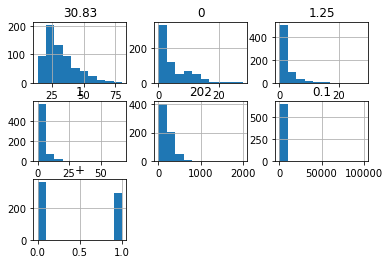

In [77]:
#Analyse des propriétés de données

print("The number of positives:", datau[datau["+"]==1].shape[0])
print("The number of negatives:", datau[datau["+"]==0].shape[0])
print(datau.shape)
datau.hist()

In [78]:
XX = datau.iloc[:, 0:6].values
YY = datau.iloc[:,6].values

In [79]:
run_classifiers(clfs, XX, YY)

-----------** Algo used : GB **------------
Accuracy Moyenne : 0.7186567164179105;  STD : 0.061292534615370514
Precision Moyenne : 0.8289001106355393;  STD : 0.1162351408703565
AUC Moyenne : 0.69534042663353;  STD : 0.06341033742102076
-----------** Algo used : DT **------------
Accuracy Moyenne : 0.7577114427860696;  STD : 0.0381928627727904
Precision Moyenne : 0.7827319141432044;  STD : 0.07130581018577811
AUC Moyenne : 0.7479248213730972;  STD : 0.04071724506940855
-----------** Algo used : RF **------------
Accuracy Moyenne : 0.7773631840796019;  STD : 0.0717262625381543
Precision Moyenne : 0.78366930171278;  STD : 0.08214453411558537
AUC Moyenne : 0.7699210417313866;  STD : 0.0742089366341196
-----------** Algo used : MLPC **------------
Accuracy Moyenne : 0.6784034373586613;  STD : 0.09300742808968418
Precision Moyenne : 0.665576424852287;  STD : 0.11980095682306346
AUC Moyenne : 0.6680345863104484;  STD : 0.09519097631373942
-----------** Algo used : KNN **------------
Accuracy 

### Normalisation des variables continues


In [81]:
scaler = StandardScaler()

scaler.fit(XX)
X_scaled = scaler.transform(XX)

In [82]:
X_train, X_test = train_test_split(X_scaled, train_size=0.5, random_state=1)
Y_train, Y_test = train_test_split(YY, train_size=0.5, random_state=1)

In [83]:
run_classifiers(clfs, X_scaled, YY)

-----------** Algo used : GB **------------
Accuracy Moyenne : 0.7186567164179105;  STD : 0.061292534615370514
Precision Moyenne : 0.8289001106355393;  STD : 0.1162351408703565
AUC Moyenne : 0.69534042663353;  STD : 0.06341033742102076
-----------** Algo used : DT **------------
Accuracy Moyenne : 0.7577114427860696;  STD : 0.0381928627727904
Precision Moyenne : 0.7827319141432044;  STD : 0.07130581018577811
AUC Moyenne : 0.7479248213730972;  STD : 0.04071724506940855
-----------** Algo used : RF **------------
Accuracy Moyenne : 0.7789009497964722;  STD : 0.0678140336338677
Precision Moyenne : 0.7843129097012155;  STD : 0.07580965758875592
AUC Moyenne : 0.7715877083980532;  STD : 0.07048335747975681
-----------** Algo used : MLPC **------------
Accuracy Moyenne : 0.7955223880597015;  STD : 0.0544079834794311
Precision Moyenne : 0.8300726584628186;  STD : 0.08041290492290595
AUC Moyenne : 0.7858372165268717;  STD : 0.05563184841744296
-----------** Algo used : KNN **------------
Accura

In [84]:
from sklearn.impute import SimpleImputer

#data = pd.read_csv("./credit.data",sep="\t")

#print(data.shape)
#data.head()

categorical_features=['b','u','g','w','v','t','t.1','f','g.1']
dataN=data[categorical_features]



impF = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impF.fit(dataN)

impMean = SimpleImputer(missing_values=np.nan, strategy='mean')
impMean.fit(datau)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [85]:
dataN = pd.get_dummies(dataN)
#data = data.drop(categorical_features, axis=1)

datau = pd.concat([datau, dataN], axis=1)

print("MAINTENAT on est a :" ,datau.shape)

#data.head()


datau.head()

MAINTENAT on est a : (665, 50)


,30.83,0,1.25,1,202,0.1,+,b_?,b_a,b_b,...,v_z,t_f,t_t,t.1_f,t.1_t,f_f,f_t,g.1_g,g.1_p,g.1_s
0,58.67,4.460,3.04,6,43.0,560,1.0,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,24.50,0.500,1.50,0,280.0,824,1.0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
2,27.83,1.540,3.75,5,100.0,3,1.0,0,0,1,...,0,0,1,0,1,0,1,1,0,0
3,20.17,5.625,1.71,0,120.0,0,1.0,0,0,1,...,0,0,1,1,0,1,0,0,0,1
4,32.08,4.000,2.50,0,360.0,0,1.0,0,0,1,...,0,0,1,1,0,0,1,1,0,0


In [86]:
#datau.iloc[:, 6].values
#print(datau.dtypes)
concat = pd.concat([datau.iloc[:, 0:6], datau.iloc[:, 7:50]], axis=1)
X=concat.values
Y = datau.iloc[:, 6].values

X_train, X_test = train_test_split(X, train_size=0.5, random_state=1)
Y_train, Y_test = train_test_split(Y, train_size=0.5, random_state=1)
Y_train=Y_train.astype('int')


print(X_train.shape)
print(Y_test.shape)

(332, 49)
(333,)


In [87]:
run_classifiers(clfs, X, Y)

-----------** Algo used : GB **------------
Accuracy Moyenne : 0.8270465852555405;  STD : 0.11108319629967486
Precision Moyenne : 0.8624335154764438;  STD : 0.16238777350848008
AUC Moyenne : 0.8223785854820338;  STD : 0.10577438797223039
-----------** Algo used : DT **------------
Accuracy Moyenne : 0.8194482134780643;  STD : 0.148326106028259
Precision Moyenne : 0.8594552337063858;  STD : 0.18878203545200958
AUC Moyenne : 0.8183972765869317;  STD : 0.13545316043626013
-----------** Algo used : RF **------------
Accuracy Moyenne : 0.8586386250565354;  STD : 0.15028682691754733
Precision Moyenne : 0.8763690476190475;  STD : 0.18412053667043643
AUC Moyenne : 0.8603160919540229;  STD : 0.1386591689733057
-----------** Algo used : MLPC **------------
Accuracy Moyenne : 0.7274762550881955;  STD : 0.1140175869143088
Precision Moyenne : 0.7210993091617419;  STD : 0.12328096428906501
AUC Moyenne : 0.7270283214248732;  STD : 0.10528534068012356
-----------** Algo used : KNN **------------
Accur

## III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

In [88]:

ytext = pd.read_csv("./SMSSpamCollection.data",sep="\t")

ytext.head()

#ytext.shape

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [89]:
for x in ytext.index:
  if ytext.loc[x, "ham"]== "spam":
    ytext.loc[x, "ham"] = 1
  else:
    ytext.loc[x, "ham"] = 0

#### CountVectorizer

In [91]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=200,stop_words='english')
vectors=vectorizer.fit_transform(ytext.iloc[:,1])
#vectorizer.get_feature_names()
vectors.shape


(5571, 200)

In [92]:
X_train, X_test = train_test_split(vectors, train_size=0.5, random_state=1)
Y_train, Y_test = train_test_split(ytext.iloc[:,0], train_size=0.5, random_state=1)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')


print (X_train.shape)
print (X_test.shape)
print (Y_train.shape)
print (Y_test.shape)

(2785, 200)
(2786, 200)
(2785,)
(2786,)


In [94]:
run_classifiers(clfs, X, Y)

-----------** Algo used : GB **------------
Accuracy Moyenne : 0.8270465852555405;  STD : 0.11108319629967486
Precision Moyenne : 0.8624335154764438;  STD : 0.16238777350848008
AUC Moyenne : 0.8223785854820338;  STD : 0.10577438797223039
-----------** Algo used : DT **------------
Accuracy Moyenne : 0.8194482134780643;  STD : 0.148326106028259
Precision Moyenne : 0.8594552337063858;  STD : 0.18878203545200958
AUC Moyenne : 0.8183972765869317;  STD : 0.13545316043626013
-----------** Algo used : RF **------------
Accuracy Moyenne : 0.8586386250565354;  STD : 0.15028682691754733
Precision Moyenne : 0.8763690476190475;  STD : 0.18412053667043643
AUC Moyenne : 0.8603160919540229;  STD : 0.1386591689733057
-----------** Algo used : MLPC **------------
Accuracy Moyenne : 0.7711442786069653;  STD : 0.0877840667757485
Precision Moyenne : 0.7986703529289342;  STD : 0.1282363011354066
AUC Moyenne : 0.7627443823133478;  STD : 0.08785766914997523
-----------** Algo used : KNN **------------
Accura

#### TfidfVectorizer

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizert = TfidfVectorizer(max_features=200,stop_words='english')
vectorst=vectorizert.fit_transform(ytext.iloc[:,1])
#vectorizer.get_feature_names()
vectorst.shape

(5571, 200)

In [96]:
run_classifiers(clfs, X, Y)

-----------** Algo used : GB **------------
Accuracy Moyenne : 0.8270465852555405;  STD : 0.11108319629967486
Precision Moyenne : 0.8624335154764438;  STD : 0.16238777350848008
AUC Moyenne : 0.8223785854820338;  STD : 0.10577438797223039
-----------** Algo used : DT **------------
Accuracy Moyenne : 0.8194482134780643;  STD : 0.148326106028259
Precision Moyenne : 0.8594552337063858;  STD : 0.18878203545200958
AUC Moyenne : 0.8183972765869317;  STD : 0.13545316043626013
-----------** Algo used : RF **------------
Accuracy Moyenne : 0.8586386250565354;  STD : 0.15028682691754733
Precision Moyenne : 0.8763690476190475;  STD : 0.18412053667043643
AUC Moyenne : 0.8603160919540229;  STD : 0.1386591689733057
-----------** Algo used : MLPC **------------
Accuracy Moyenne : 0.7426956128448665;  STD : 0.10640075873716504
Precision Moyenne : 0.740776415724497;  STD : 0.14250684287618146
AUC Moyenne : 0.7378393911152532;  STD : 0.10616474454975583
-----------** Algo used : KNN **------------
Accur

##### TruncatedSVD

In [98]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
vectorsSVD=svd.fit_transform(vectorst)
#vectorizer.get_feature_names()
vectorsSVD.shape

(5571, 5)

In [99]:
run_classifiers(clfs, X, Y)

-----------** Algo used : GB **------------
Accuracy Moyenne : 0.8270465852555405;  STD : 0.11108319629967486
Precision Moyenne : 0.8624335154764438;  STD : 0.16238777350848008
AUC Moyenne : 0.8223785854820338;  STD : 0.10577438797223039
-----------** Algo used : DT **------------
Accuracy Moyenne : 0.8194482134780643;  STD : 0.148326106028259
Precision Moyenne : 0.8594552337063858;  STD : 0.18878203545200958
AUC Moyenne : 0.8183972765869317;  STD : 0.13545316043626013
-----------** Algo used : RF **------------
Accuracy Moyenne : 0.8586386250565354;  STD : 0.15028682691754733
Precision Moyenne : 0.8763690476190475;  STD : 0.18412053667043643
AUC Moyenne : 0.8603160919540229;  STD : 0.1386591689733057
-----------** Algo used : MLPC **------------
Accuracy Moyenne : 0.7893713251922208;  STD : 0.06794347995741284
Precision Moyenne : 0.8253574165298303;  STD : 0.059677876425471045
AUC Moyenne : 0.77887516827172;  STD : 0.07528041008906247
-----------** Algo used : KNN **------------
Accur